In [1]:
import pandas as pd
import os
import datetime

In [3]:
kpi_path = '平台指标/'
trace_path = '调用链指标/'
list_path = '/mnt/c/Users/tiago/Documents/Uni/anm/anm-project/data/labeled_data/results.csv'

In [4]:
kpilist = [kpi_path + f for f in os.listdir(kpi_path)]
tracelist = [trace_path + f for f in os.listdir(trace_path)]

In [6]:
def parse(df):
    type = df.iloc[0]['callType']
    if type == 'JDBC':
        df['serviceName'] = df['dsName']
        df = df.drop('dsName', axis=1)
    elif type == 'LOCAL':
        df = df.drop('dsName', axis=1)
    return df

In [7]:
anomalies = pd.read_csv(list_path).drop('index', axis=1)
anomalies

,object,fault_desrcibtion,kpi,name,container,log_time,log_block,block,start_time,duration
0,docker,CPU fault,container_cpu_used,docker_003,container_001,2020/4/11 0:05,NaN,NaN,NaN,5min
1,docker,network delay,NaN,docker_002,container_001,2020/4/11 0:35,NaN,NaN,NaN,5min
2,docker,network delay,NaN,docker_001,container_001,2020/4/11 1:10,NaN,NaN,NaN,5min
3,docker,CPU fault,container_cpu_used,docker_004,container_001,2020/4/11 1:40,NaN,NaN,NaN,5min
4,db,db connection limit,Proc_User_Used_Pct;Proc_Used_Pct;Sess_Connect,db_007,NaN,2020/4/11 2:15,NaN,NaN,NaN,5min
...,...,...,...,...,...,...,...,...,...,...
76,os,network delay,Sent_queue;Received_queue,os_017,NaN,2020/4/14 3:17,1.0,10.0,2020/5/31 3:17,5min
77,db,db connection limit,Proc_User_Used_Pct;Proc_Used_Pct;Sess_Connect,db_003,NaN,2020/4/14 3:47,1.0,10.0,2020/5/31 3:47,5min
78,docker,CPU fault,container_cpu_used,docker_004,container_001,2020/4/14 4:17,1.0,10.0,2020/5/31 4:17,5min
79,docker,network delay,NaN,docker_006,container_002,2020/4/14 4:47,1.0,10.0,2020/5/31 4:47,5min


In [73]:
anomalous_times = anomalies['start_time'].iloc[12:18]
anomalous_times

12    2020/5/22 0:48
13    2020/5/22 1:18
14    2020/5/22 1:48
15    2020/5/22 2:18
16    2020/5/22 5:18
17    2020/5/22 5:48
Name: start_time, dtype: object

In [74]:
trace_window_size = 1000*60*5   #  5 minutes
kpis_window_size = 1000*60*60   # 60 minutes

In [75]:
def fn(row):
    b = datetime.datetime.strptime(row, '%Y/%m/%d %H:%M')
    return int((datetime.datetime.timestamp(b) - 60*60*7) * 1000)
times = list(anomalous_times.apply(fn))
times

[1590079680000,
 1590081480000,
 1590083280000,
 1590085080000,
 1590095880000,
 1590097680000]

In [18]:
def load_list(list):
    return map(lambda x: (x, pd.read_csv(x)), list)

In [106]:
for index, timestamp in enumerate(times):
    timestamp += 1000*60*15
    trace_start = timestamp - trace_window_size
    kpi_start = timestamp - kpis_window_size
    index+=1
    print('Handling time ', timestamp)
    if not os.path.exists(f'test{index}'):
            os.mkdir(f'test{index}')
    for name, df in load_list(kpilist):
        if not os.path.exists(f'test{index}/kpis'):
            os.mkdir(f'test{index}/kpis')
        print('Saving ', f'{os.getcwd()}/test{index}/kpis/{name.split("/")[-1]}')
        df[(df['timestamp'] >= kpi_start) & (df['timestamp'] <= timestamp)].to_csv(f'{os.getcwd()}/test{index}/kpis/{name.split("/")[-1]}')
    
#     for name, df in load_list(tracelist):
#         if not os.path.exists(f'test{index}/trace'):
#             os.mkdir(f'test{index}/trace')
#         print('Saving ', name.split('/')[-1])
#         df[(df['startTime'] >= trace_start) & (df['startTime'] <= timestamp)].to_csv(f'test{index}/trace/{name.split("/")[-1]}')
    
    

Handling time  1590080580000
Saving  /mnt/c/Users/tiago/Documents/Uni/anm/anm-project/data/labeled_data/AIOps挑战赛数据/2020_05_22/2020_05_22/test1/kpis/db_oracle_11g.csv
Saving  /mnt/c/Users/tiago/Documents/Uni/anm/anm-project/data/labeled_data/AIOps挑战赛数据/2020_05_22/2020_05_22/test1/kpis/dcos_container.csv
Saving  /mnt/c/Users/tiago/Documents/Uni/anm/anm-project/data/labeled_data/AIOps挑战赛数据/2020_05_22/2020_05_22/test1/kpis/dcos_docker.csv
Saving  /mnt/c/Users/tiago/Documents/Uni/anm/anm-project/data/labeled_data/AIOps挑战赛数据/2020_05_22/2020_05_22/test1/kpis/mw_redis.csv
Saving  /mnt/c/Users/tiago/Documents/Uni/anm/anm-project/data/labeled_data/AIOps挑战赛数据/2020_05_22/2020_05_22/test1/kpis/os_linux.csv
Handling time  1590082380000
Saving  /mnt/c/Users/tiago/Documents/Uni/anm/anm-project/data/labeled_data/AIOps挑战赛数据/2020_05_22/2020_05_22/test2/kpis/db_oracle_11g.csv
Saving  /mnt/c/Users/tiago/Documents/Uni/anm/anm-project/data/labeled_data/AIOps挑战赛数据/2020_05_22/2020_05_22/test2/kpis/dcos_contain

In [22]:
os.listdir('test2/kpis')

['db_oracle_11g.csv',
 'dcos_container.csv',
 'dcos_docker.csv',
 'mw_redis.csv',
 'os_linux.csv']

In [94]:
t = pd.read_csv('test1/kpis/dcos_docker.csv')

In [95]:
t['timestamp'] = t['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000.0))
t = t.set_index('timestamp')

<AxesSubplot:xlabel='timestamp'>

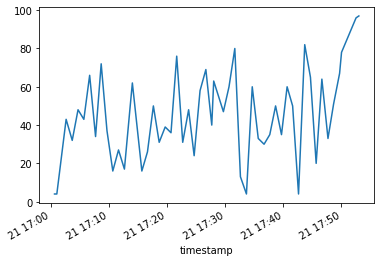

In [109]:
t[(t['name'] == 'container_cpu_used') & (t['cmdb_id'] == 'docker_001')]['value'].plot()

In [46]:
db = pd.read_csv(kpi_path + 'db_oracle_11g.csv')

In [51]:
db['timestamp'] = db['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000.0))
db = db.set_index('timestamp')

<AxesSubplot:xlabel='timestamp'>

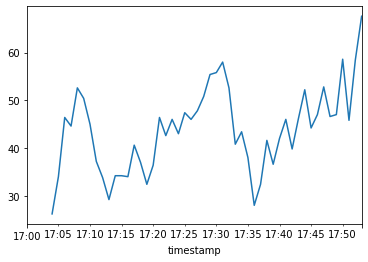

In [105]:
df = t[(t['name'] == 'container_cpu_used') & (t['cmdb_id'] == 'docker_001')]['value'].resample('T').sum()
df.rolling(5).mean().plot()

In [85]:
esb = pd.read_csv('业务指标/esb.csv')

<AxesSubplot:xlabel='startTime'>

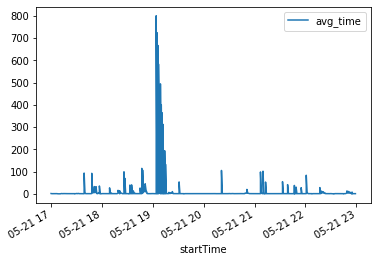

In [89]:
esb['startTime'] = esb['startTime'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000))
esb.plot('startTime', 'avg_time')

In [91]:
esb.iloc[40:60]

,serviceName,startTime,avg_time,num,succee_num,succee_rate
40,osb_001,2020-05-21 17:39:00,0.4519,182,182,1.0000
41,osb_001,2020-05-21 17:39:00,93.2014,10,9,0.9000
42,osb_001,2020-05-21 17:40:00,1.8825,312,312,1.0000
43,osb_001,2020-05-21 17:41:00,0.7207,493,493,1.0000
44,osb_001,2020-05-21 17:42:00,0.6490,474,474,1.0000
45,osb_001,2020-05-21 17:43:00,0.7498,476,476,1.0000
46,osb_001,2020-05-21 17:44:00,0.8463,487,487,1.0000
47,osb_001,2020-05-21 17:45:00,0.6773,491,491,1.0000
48,osb_001,2020-05-21 17:46:00,0.7951,490,490,1.0000
49,osb_001,2020-05-21 17:47:00,0.7204,474,474,1.0000


In [111]:
docker = pd.read_csv('/mnt/c/Users/tiago/Documents/Uni/anm/anm-project/data/training_data/host/dcos_docker.csv')

In [270]:
df = docker[(docker['name'] == 'container_cpu_used') & (docker['cmdb_id'] == 'docker_003')]
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1000))
df.set_index('timestamp')

<ipython-input-270-6a7ed4bed294>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1000))


,itemid,name,bomc_id,value,cmdb_id
timestamp,,,,,
2020-05-03 17:00:13,999999996381403,container_cpu_used,ZJ-004-059,24.0,docker_003
2020-05-03 17:01:12,999999996381403,container_cpu_used,ZJ-004-059,6.0,docker_003
2020-05-03 17:02:13,999999996381403,container_cpu_used,ZJ-004-059,69.0,docker_003
2020-05-03 17:03:13,999999996381403,container_cpu_used,ZJ-004-059,3.0,docker_003
2020-05-03 17:04:15,999999996381403,container_cpu_used,ZJ-004-059,18.0,docker_003
...,...,...,...,...,...
2020-05-04 16:55:52,999999996381403,container_cpu_used,ZJ-004-059,72.0,docker_003
2020-05-04 16:56:55,999999996381403,container_cpu_used,ZJ-004-059,73.0,docker_003
2020-05-04 16:57:52,999999996381403,container_cpu_used,ZJ-004-059,54.0,docker_003


<AxesSubplot:>

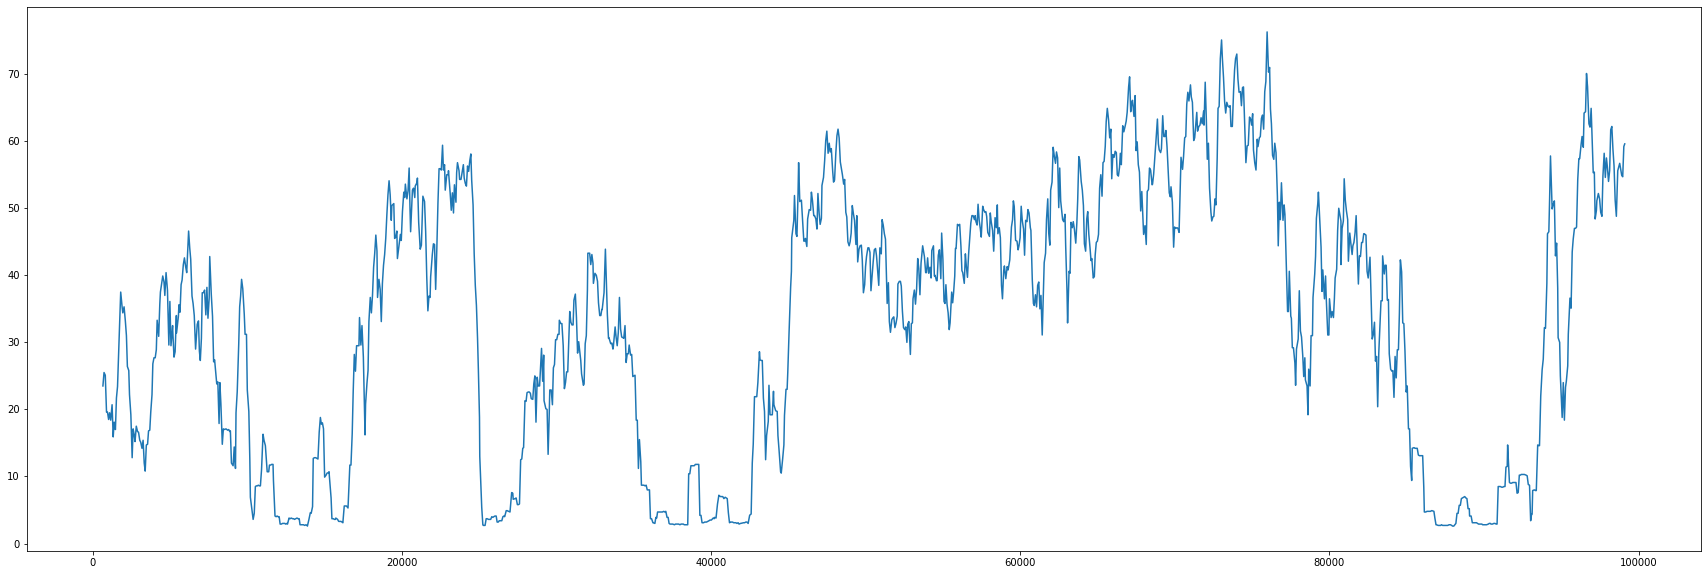

In [152]:
df['value'].rolling(10).mean().plot(figsize=(30,10))

In [158]:
b = df['value'].rolling(5).mean().dropna()
b

297      24.0
387      19.6
450      25.6
497      16.6
570      26.2
         ... 
98852    64.0
98912    76.2
98975    69.6
99047    69.0
99106    69.0
Name: value, Length: 1376, dtype: float64

In [154]:
mini = b.quantile([0.05]).values[0]
maxi = b.quantile([0.95]).values[0]

<AxesSubplot:>

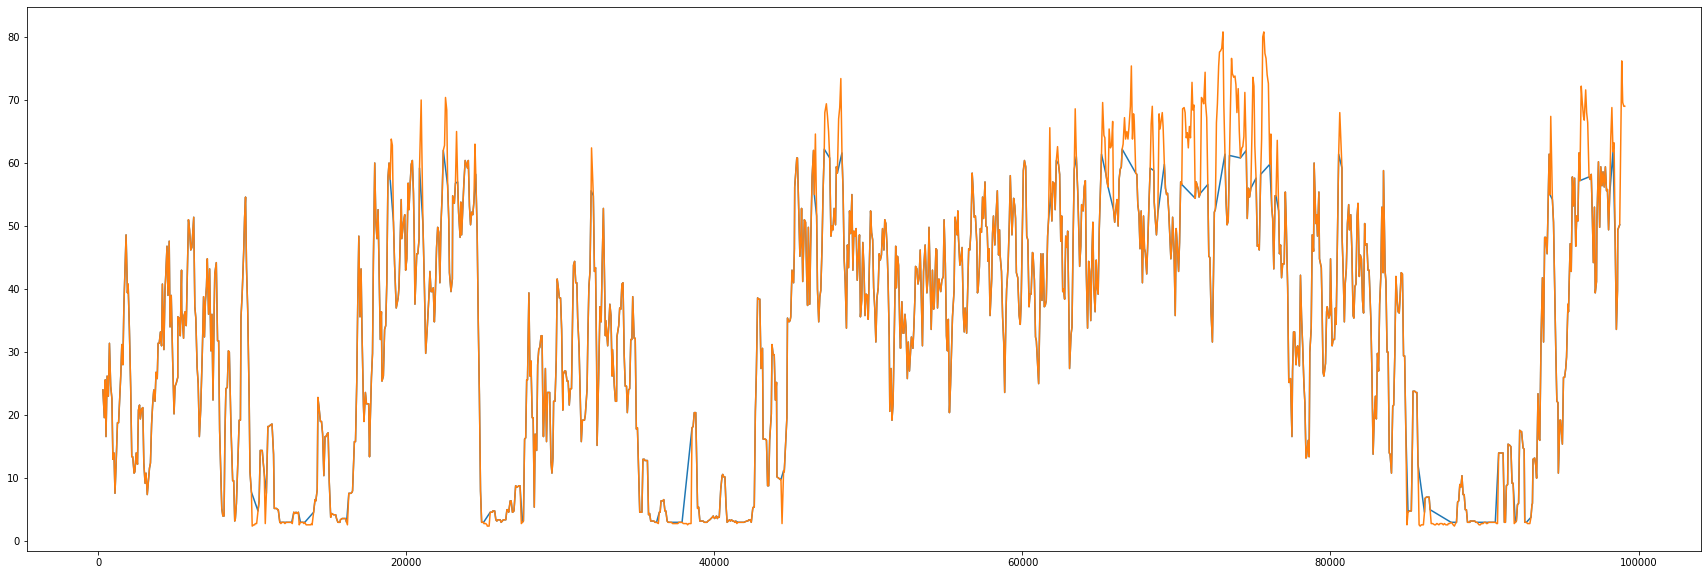

In [167]:
b[(mini <= b) & (b <= maxi)].plot(figsize=(30,10))
df['value'].rolling(5).mean().interpolate().plot(figsize=(30,10))

In [148]:
d = df['value']
d = (d - d.mean())/d.std()
d

55      -0.832206
129     -0.804295
199     -0.832206
271     -0.832206
335      1.512372
           ...   
98802   -0.832206
98874   -0.804295
98921    0.702934
99018    1.037874
99090    1.344902
Name: value, Length: 1373, dtype: float64

<AxesSubplot:>

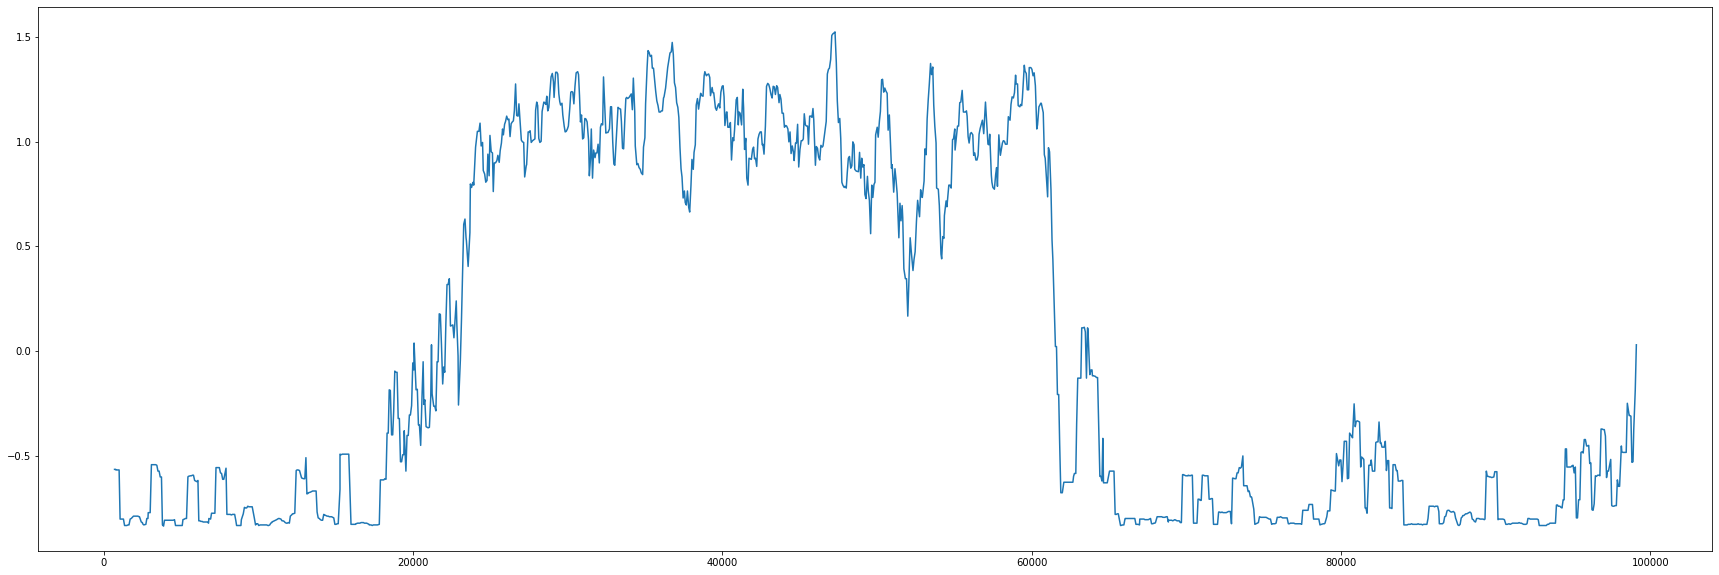

In [150]:
d.rolling(10).mean().dropna().plot(figsize=(30,10))

<AxesSubplot:>

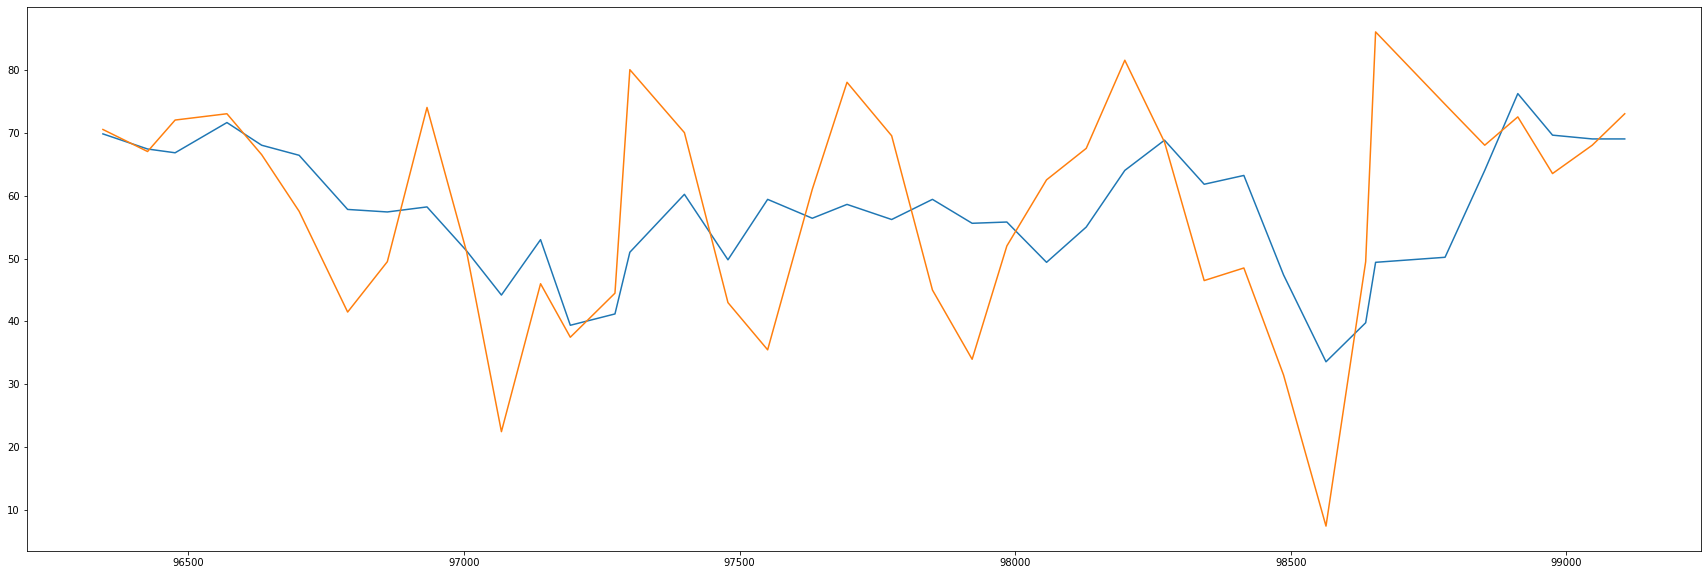

In [166]:
b[-40:].plot()
df['value'].rolling(2).mean().interpolate()[-40:].plot(figsize=(30,10))

In [250]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
dataset = pd.read_csv(
    '/mnt/c/Users/tiago/Documents/Uni/anm/anm-project/data/training_data/host/dcos_docker.csv')
dataset = dataset[(dataset['name'] == 'container_cpu_used') & (dataset['cmdb_id'] == 'docker_003')]
dataset['timestamp'] = dataset['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000.0))
dataset = dataset.set_index('timestamp')['value']
dataset = dataset.resample('T').mean().interpolate()

In [261]:
size = 100
train = dataset[:-size]
test = dataset[-size:]

In [262]:
model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=10).fit()

In [263]:
predictions = model.predict(start=test.index[0], end=test.index[-1])

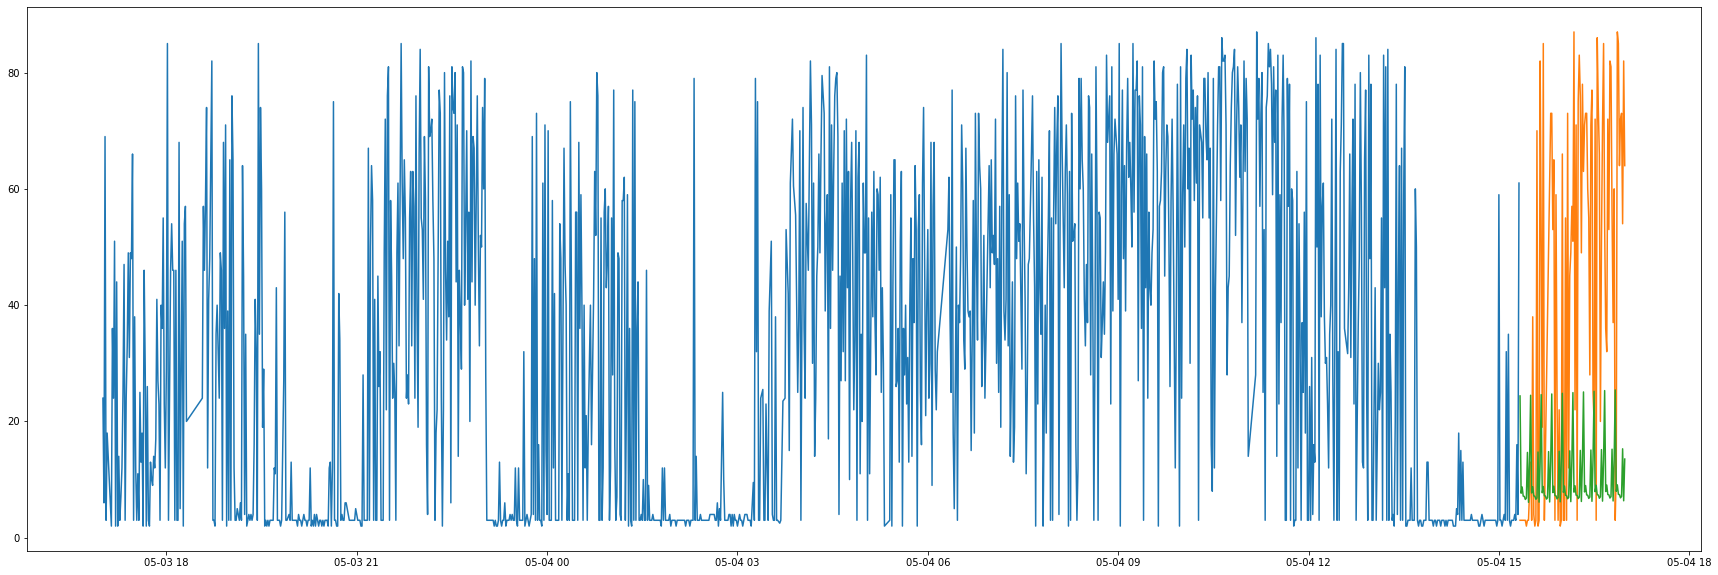

In [264]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,10))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predictions.index, predictions, label='Holt-Winters')

In [265]:
from sklearn.cluster import dbscan

In [266]:
dbscan

<function sklearn.cluster._dbscan.dbscan(X, eps=0.5, *, min_samples=5, metric='minkowski', metric_params=None, algorithm='auto', leaf_size=30, p=2, sample_weight=None, n_jobs=None)>

In [267]:
import numpy as np

In [271]:
df = docker[(docker['name'] == 'container_cpu_used') & (docker['cmdb_id'] == 'docker_003')]
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1000))
df.set_index('timestamp')

<ipython-input-271-6a7ed4bed294>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1000))


,itemid,name,bomc_id,value,cmdb_id
timestamp,,,,,
2020-05-03 17:00:13,999999996381403,container_cpu_used,ZJ-004-059,24.0,docker_003
2020-05-03 17:01:12,999999996381403,container_cpu_used,ZJ-004-059,6.0,docker_003
2020-05-03 17:02:13,999999996381403,container_cpu_used,ZJ-004-059,69.0,docker_003
2020-05-03 17:03:13,999999996381403,container_cpu_used,ZJ-004-059,3.0,docker_003
2020-05-03 17:04:15,999999996381403,container_cpu_used,ZJ-004-059,18.0,docker_003
...,...,...,...,...,...
2020-05-04 16:55:52,999999996381403,container_cpu_used,ZJ-004-059,72.0,docker_003
2020-05-04 16:56:55,999999996381403,container_cpu_used,ZJ-004-059,73.0,docker_003
2020-05-04 16:57:52,999999996381403,container_cpu_used,ZJ-004-059,54.0,docker_003


In [272]:
window = 10

In [285]:
values = df['value'].values

In [286]:
values = (values - values.mean()) / values.std()

In [287]:
arr = np.convolve(values, np.ones((window,))/window, mode='valid')

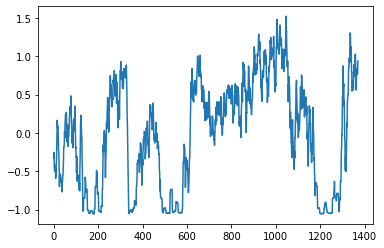

In [288]:
plt.plot(arr)

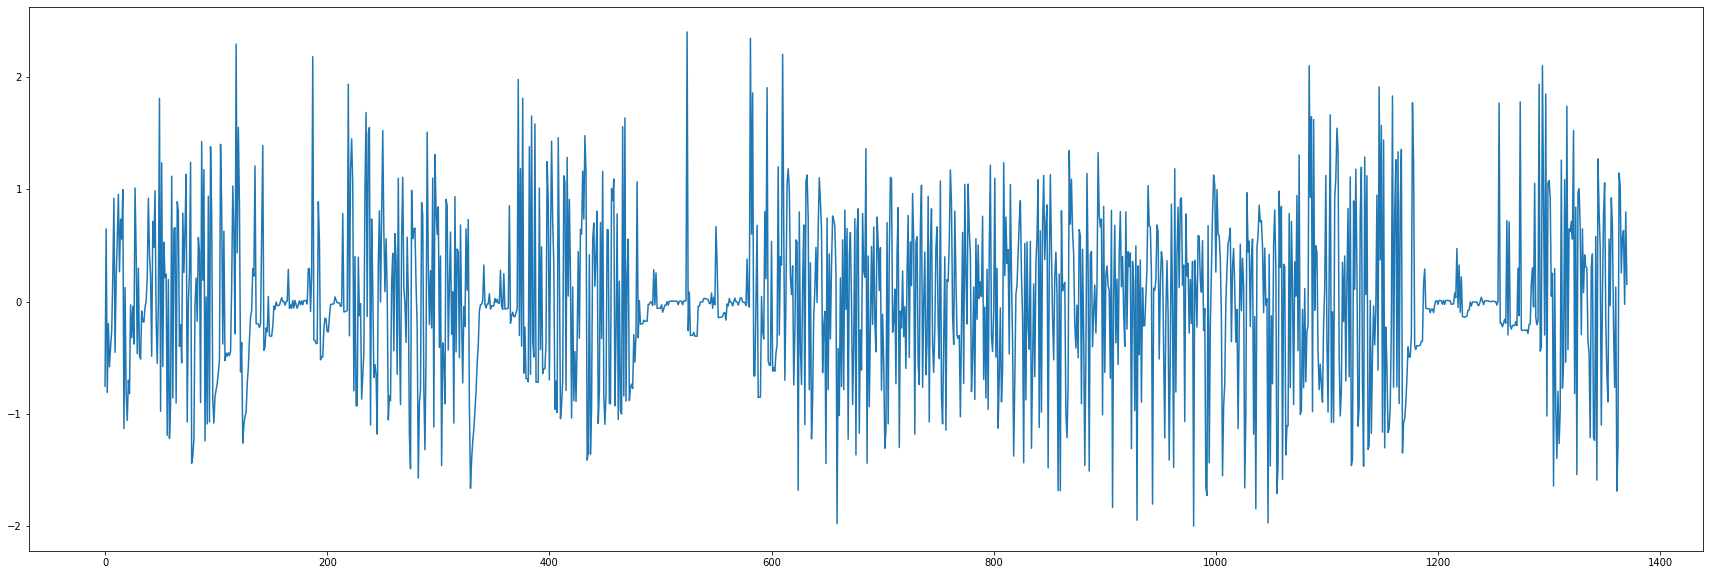

In [290]:
plt.figure(figsize=(30,10))
plt.plot((values[window-1:] - arr))

In [307]:
def baseline_fn(values, w=5):
    values = (values - values.mean()) / values.std()
    baseline = np.convolve(values, np.ones((w,))/w, mode='valid')
    residual = values[w-1:] - baseline
    return baseline, residual

In [309]:
b1, r1 = baseline_fn(df['value'].values)

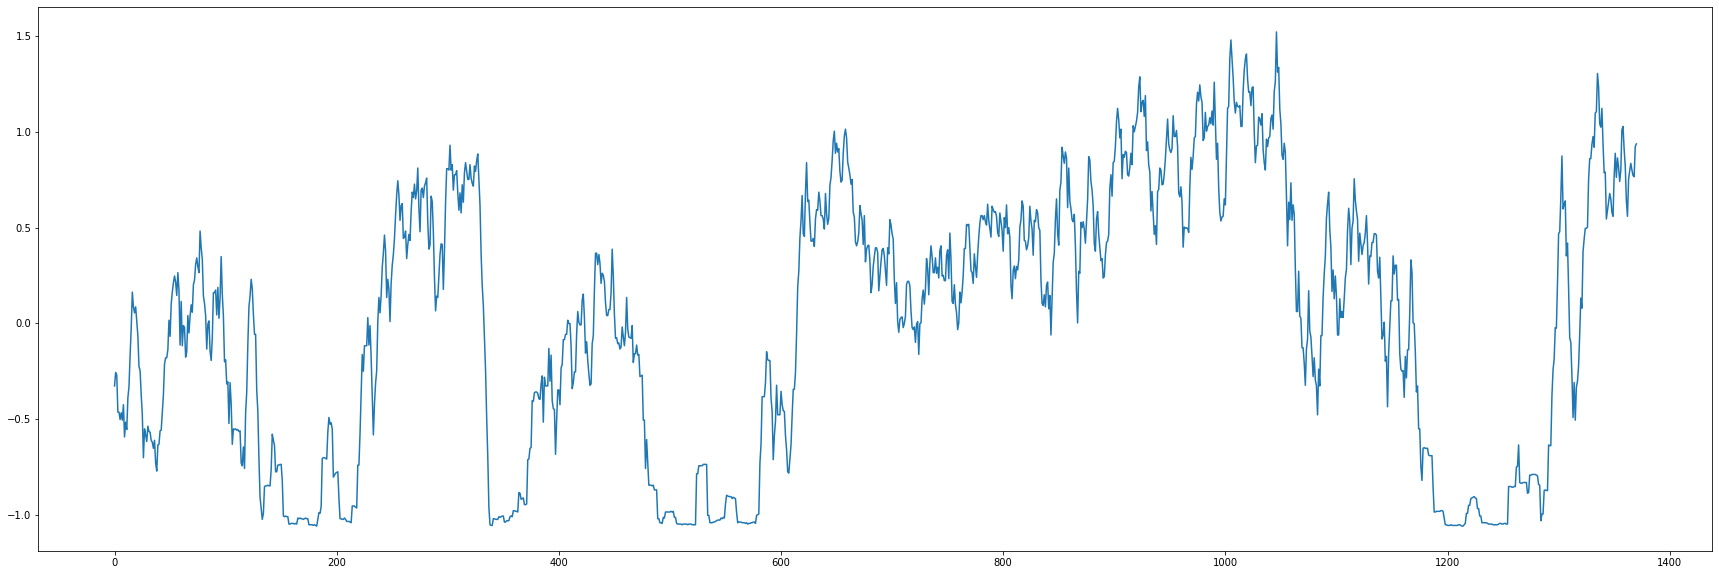

In [294]:
plt.figure(figsize=(30,10))
plt.plot(b1)

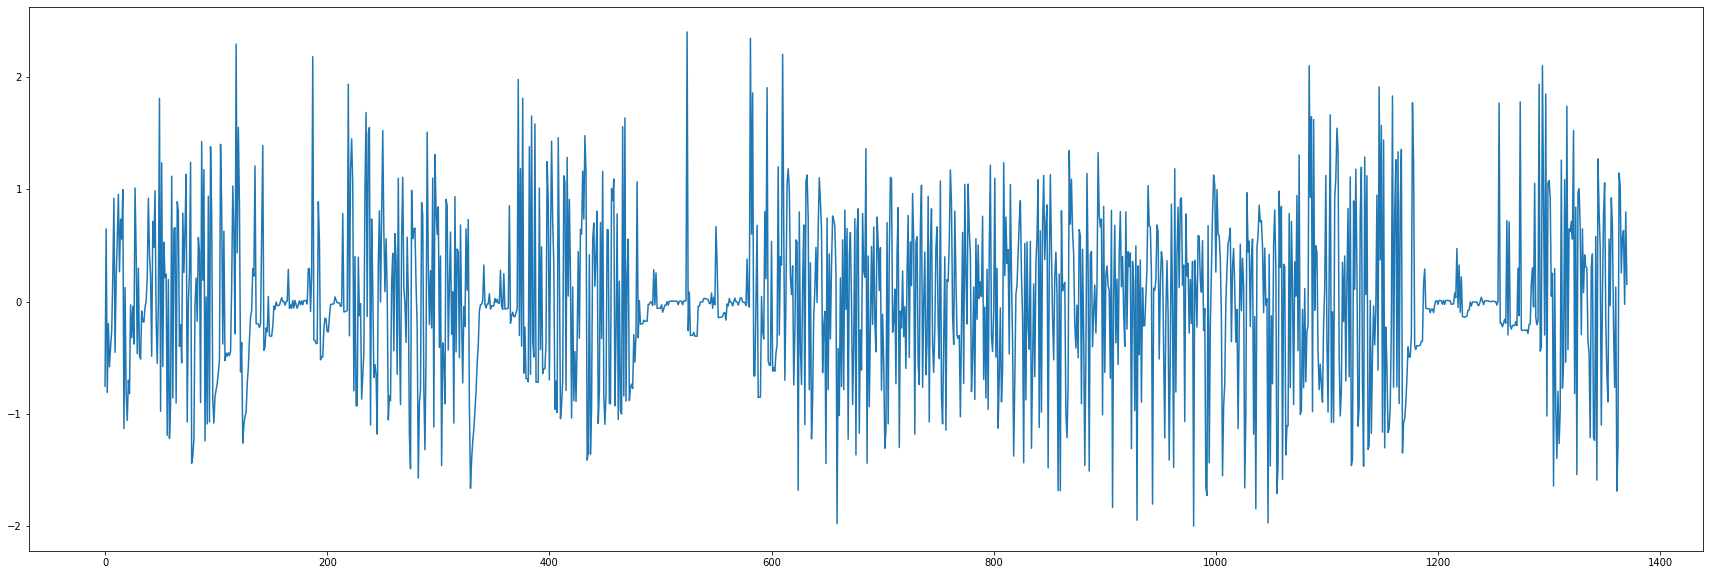

In [295]:
plt.figure(figsize=(30,10))
plt.plot(r1)

In [298]:
docker = pd.read_csv('/mnt/c/Users/tiago/Documents/Uni/anm/anm-project/data/test_data/host/docker.csv')

In [299]:
test_df = docker[(docker['name'] == 'container_cpu_used') & (docker['cmdb_id'] == 'docker_003')]

In [308]:
b2, r2 = baseline_fn(test_df['value'].values)

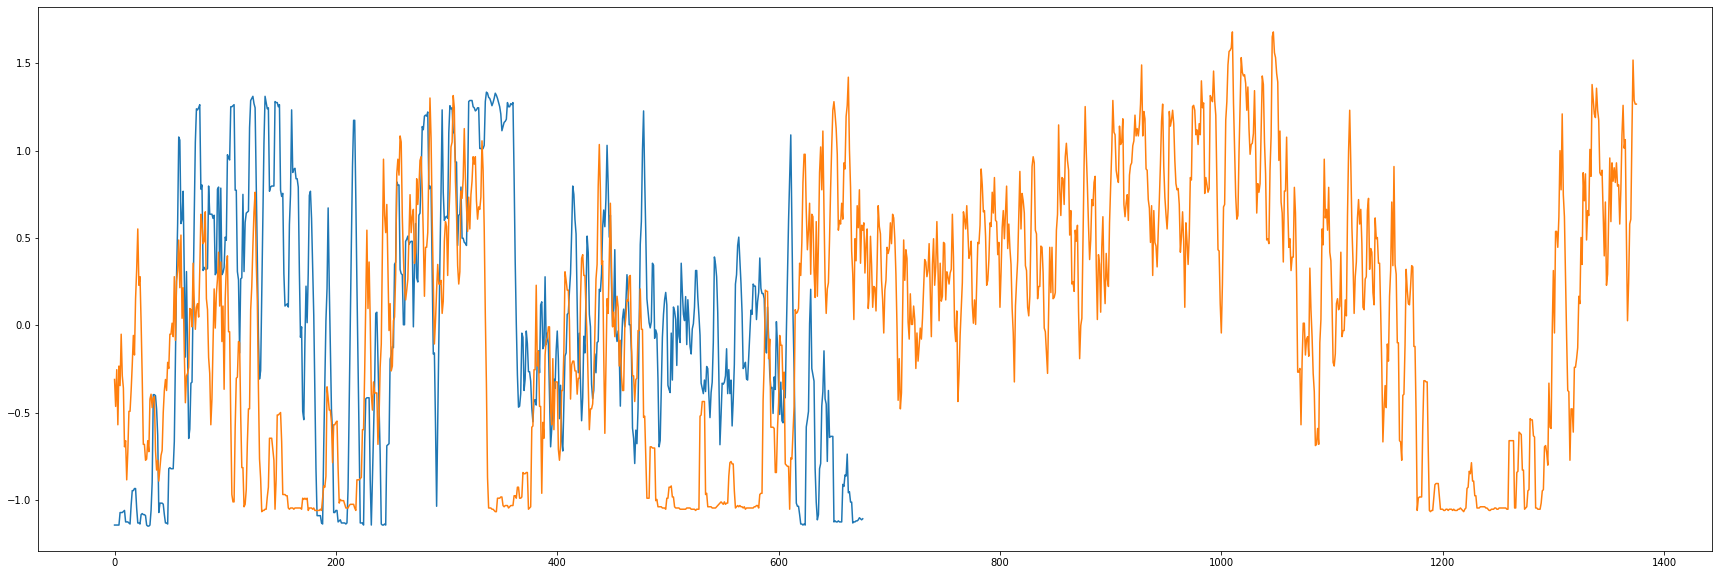

In [312]:
plt.figure(figsize=(30,10))
plt.plot(b2)
plt.plot(b1)

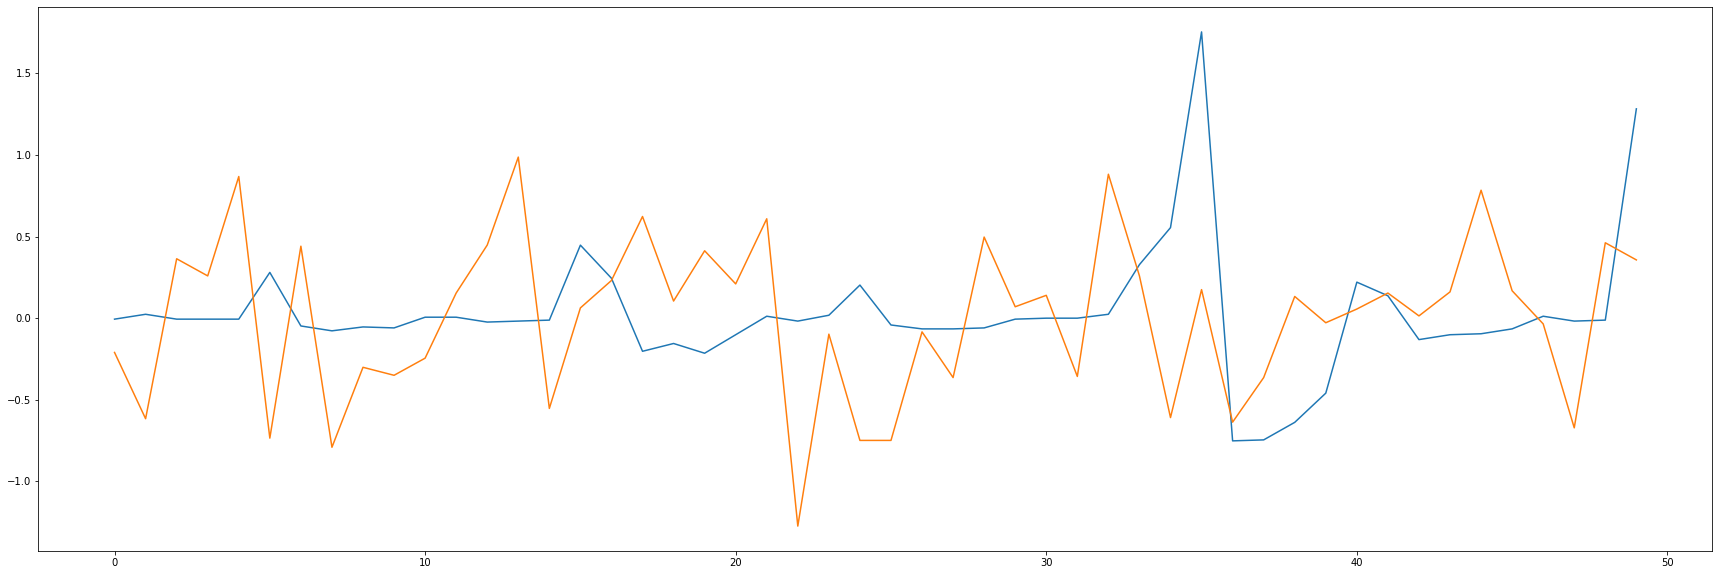

In [311]:
plt.figure(figsize=(30,10))
plt.plot(r2[:50])
plt.plot(r1[:50])

In [ ]:
np.convolve()